In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/train'
valid_path = '/content/drive/MyDrive/Datasets/validation'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Datasets/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 366 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 78 images belonging to 5 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
12/12 [==============================] - 139s 12s/step - loss: 10.4686 - accuracy: 0.2240 - val_loss: 6.8518 - val_accuracy: 0.2308
Epoch 2/50
12/12 [==============================] - 75s 6s/step - loss: 5.1017 - accuracy: 0.2295 - val_loss: 2.5017 - val_accuracy: 0.4103
Epoch 3/50
12/12 [==============================] - 76s 6s/step - loss: 2.6603 - accuracy: 0.2978 - val_loss: 2.6235 - val_accuracy: 0.2564
Epoch 4/50
12/12 [==============================] - 76s 6s/step - loss: 1.6932 - accuracy: 0.3525 - val_loss: 1.5820 - val_accuracy: 0.4487
Epoch 5/50
12/12 [==============================] - 76s 6s/step - loss: 1.3955 - accuracy: 0.4098 - val_loss: 1.3658 - val_accuracy: 0.6282
Epoch 6/50
12/12 [==============================] - 76s 6s/step - loss: 1.4744 - accuracy: 0.4208 - val_loss: 1.1251 - val_accuracy: 0.5128
Epoch 7/50
12/12 [==============================] - 84s 7s/step - loss: 1.3835 - accuracy: 0.4809 - val_loss: 1.0655 - val_accuracy: 0.5769
Epoch 8/50
12/12 

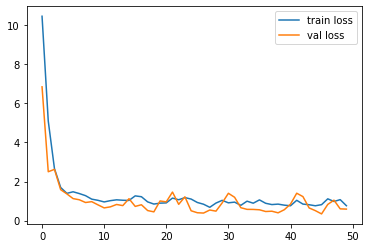

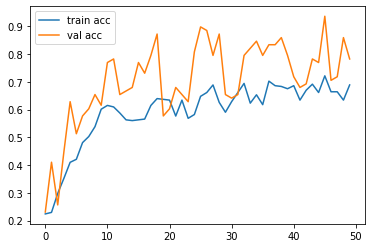

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Datasets/model_resnet_50.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
print('Accuracy Score = ',np.max(r.history['val_accuracy']))

Accuracy Score =  0.9358974099159241


In [ ]:
model=load_model('/content/drive/MyDrive/Datasets/model_resnet_50.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Datasets/test/test2.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[ 54.,  45.,  38.],
        [ 66.,  56.,  46.],
        [ 54.,  41.,  25.],
        ...,
        [248., 223., 183.],
        [248., 222., 185.],
        [248., 222., 185.]],

       [[ 67.,  53.,  40.],
        [ 42.,  30.,  18.],
        [ 50.,  40.,  30.],
        ...,
        [251., 226., 186.],
        [249., 223., 186.],
        [248., 222., 185.]],

       [[ 66.,  50.,  34.],
        [ 52.,  38.,  25.],
        [ 85.,  76.,  69.],
        ...,
        [250., 225., 185.],
        [248., 222., 185.],
        [249., 223., 186.]],

       ...,

       [[ 60.,  56.,  57.],
        [ 58.,  54.,  53.],
        [ 52.,  47.,  44.],
        ...,
        [104.,  75.,  59.],
        [ 98.,  70.,  56.],
        [ 87.,  61.,  48.]],

       [[ 53.,  48.,  52.],
        [ 53.,  49.,  50.],
        [ 53.,  47.,  47.],
        ...,
        [108.,  79.,  63.],
        [ 96.,  68.,  54.],
        [ 91.,  65.,  52.]],

       [[ 58.,  53.,  59.],
        [ 52.,  47.,  51.],
        [ 55.,  

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[9.4929653e-01, 2.1677200e-08, 6.6685379e-03, 5.7969905e-13,
        4.4034876e-02]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)
print(a)

[0]


In [ ]:
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
temp_predictions = [labels[k] for k in a]
print(labels)
print(temp_predictions[0])


{0: 'AadharCard', 1: 'DrivingLicence', 2: 'EmiratesID', 3: 'PanCard', 4: 'VoterID'}
AadharCard
